In [1]:
!nvidia-smi

Sun Nov 12 05:31:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
%cd /content/drive/MyDrive/Segmentation
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="4fKypvm1whTJZvRD3O01")
project = rf.workspace("a-0uuoj").project("x-ray-images-kv2sy")
dataset = project.version(1).download("yolov8")

/content/drive/MyDrive/Segmentation
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.208, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to x-ray-images-1 in yolov8:: 100%|██████████| 247/247 [00:00<00:00, 8215.97it/s]


## Custom Training

In [1]:
%cd /content/drive/MyDrive/Segmentation

!yolo task=segment mode=train model=yolov8s-seg.pt data='/content/drive/MyDrive/Segmentation/datasets/x-ray-images-1/data.yaml' epochs=150 imgsz=640

/content/drive/MyDrive/Segmentation
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/drive/MyDrive/Segmentation/datasets/x-ray-images-1/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False

In [4]:
model1=YOLO("/content/drive/MyDrive/Segmentation/runs/segment/train/weights/best.pt")

In [5]:
%cd /content/drive/MyDrive/Segmentation
!yolo task=segment mode=predict model='/content/drive/MyDrive/Segmentation/runs/segment/train/weights/best.pt' conf=0.25 source='/content/drive/MyDrive/project/data/train/images/IM-0538-0001.jpeg'

/content/drive/MyDrive/Segmentation
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781922 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/drive/MyDrive/project/data/train/images/IM-0538-0001.jpeg: 544x640 2 Hearts, 1 PNEUMONIA_Bacteria, 76.6ms
Speed: 3.0ms preprocess, 76.6ms inference, 2.5ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


[Errno 2] No such file or directory: '{HOME}'
/content/drive/MyDrive/Segmentation


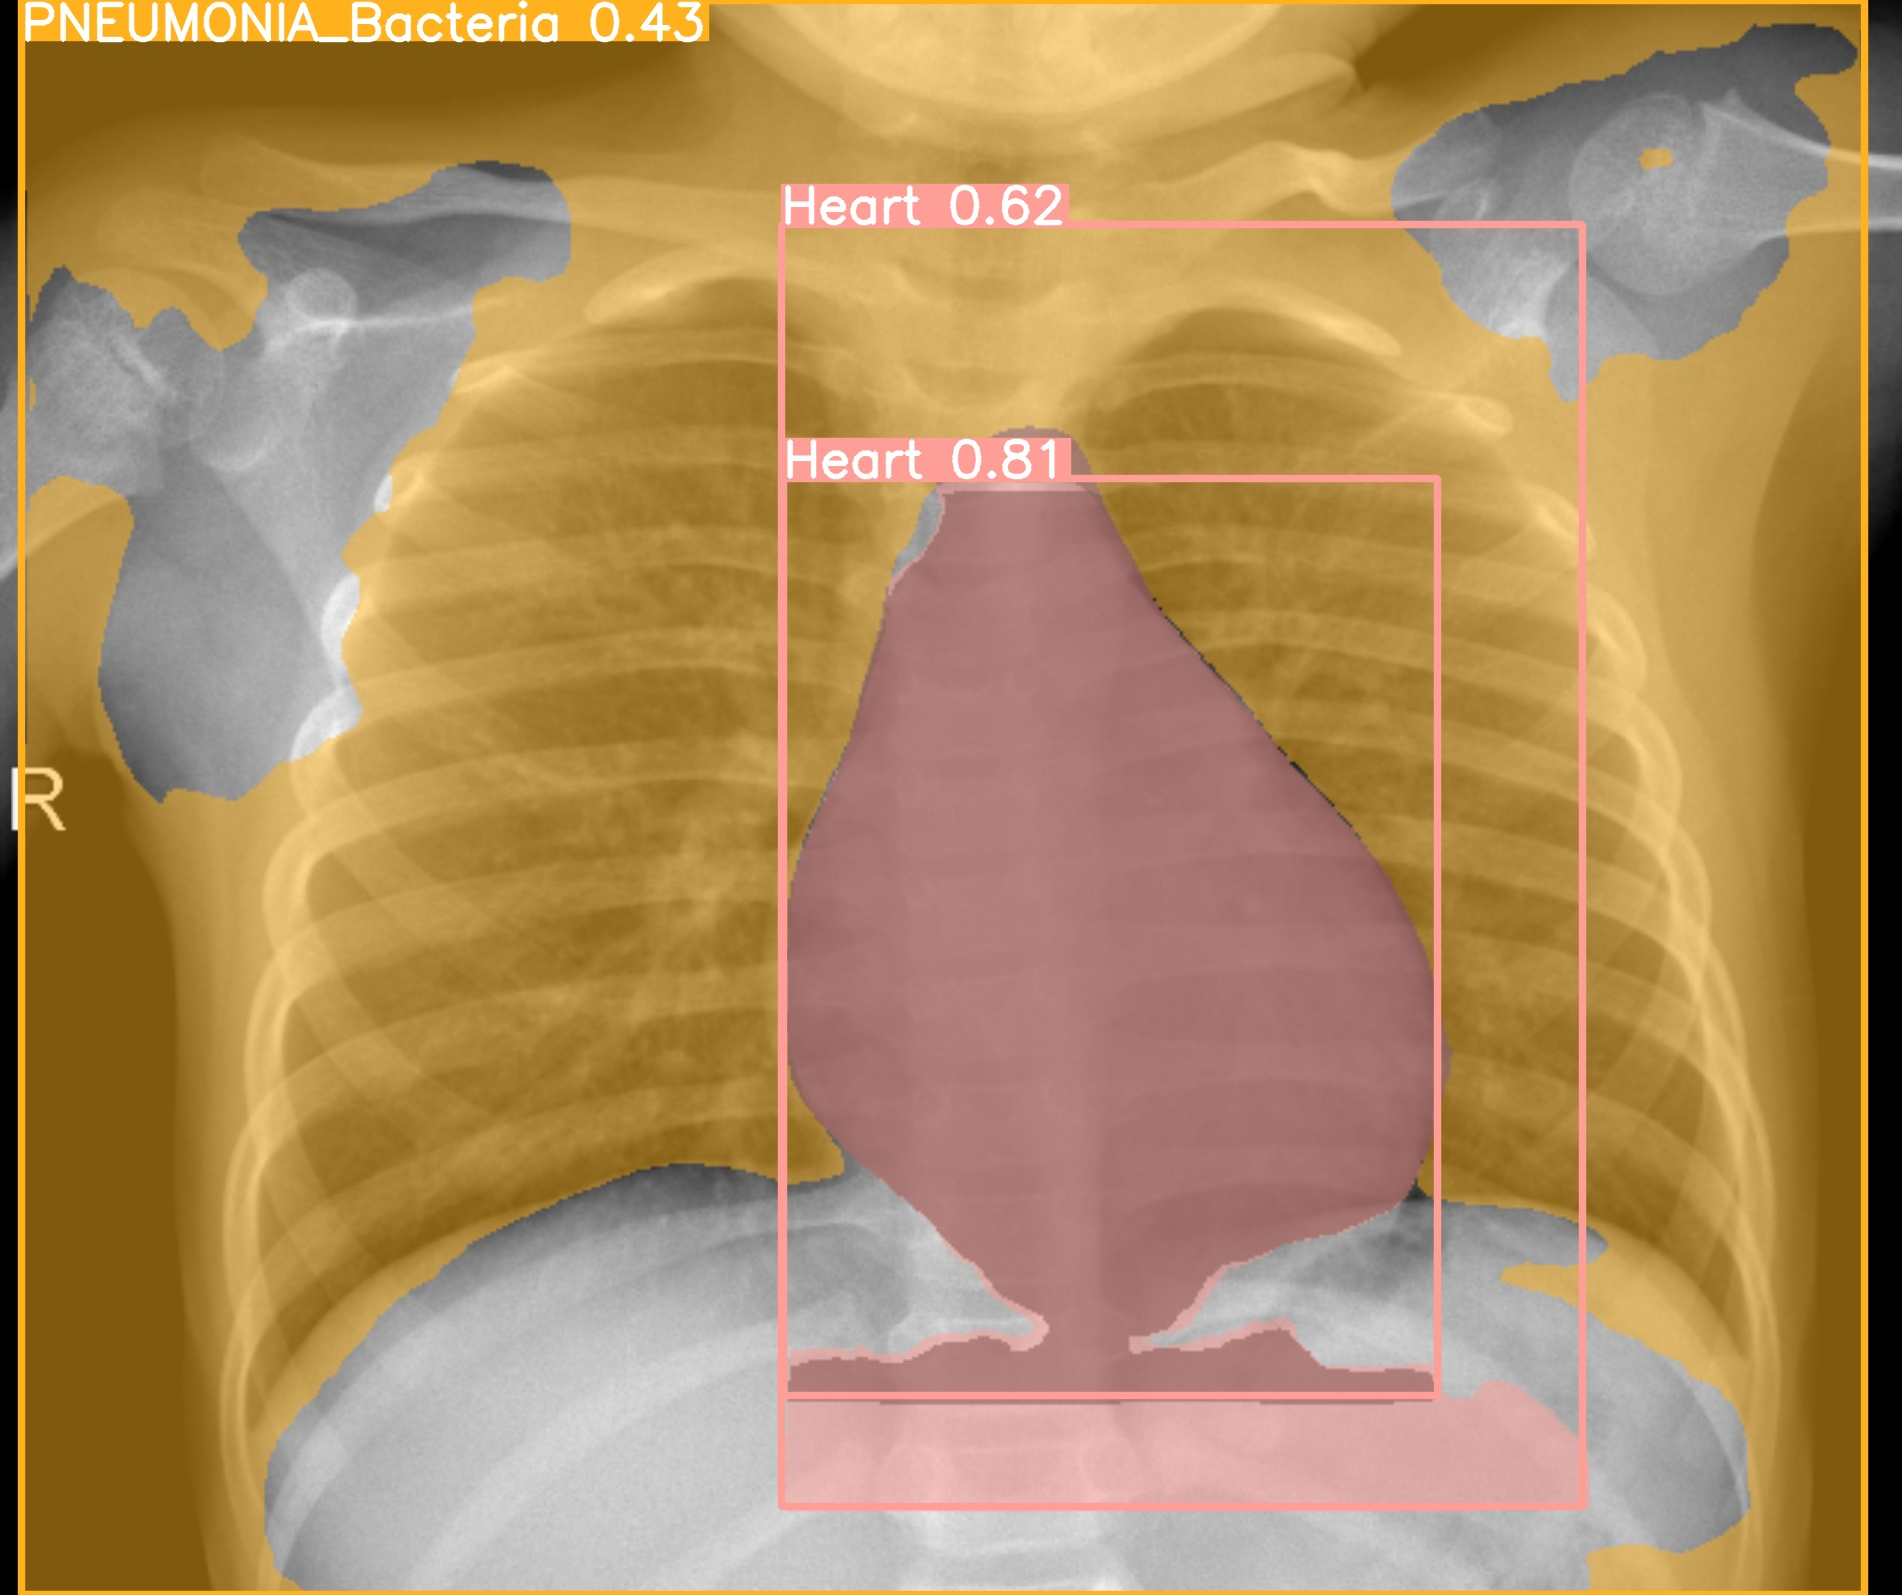

In [6]:
%cd {HOME}
Image(filename='/content/drive/MyDrive/Segmentation/runs/segment/predict/IM-0538-0001.jpeg', height=600)

[Errno 2] No such file or directory: '{HOME}'
/content/drive/MyDrive/Segmentation


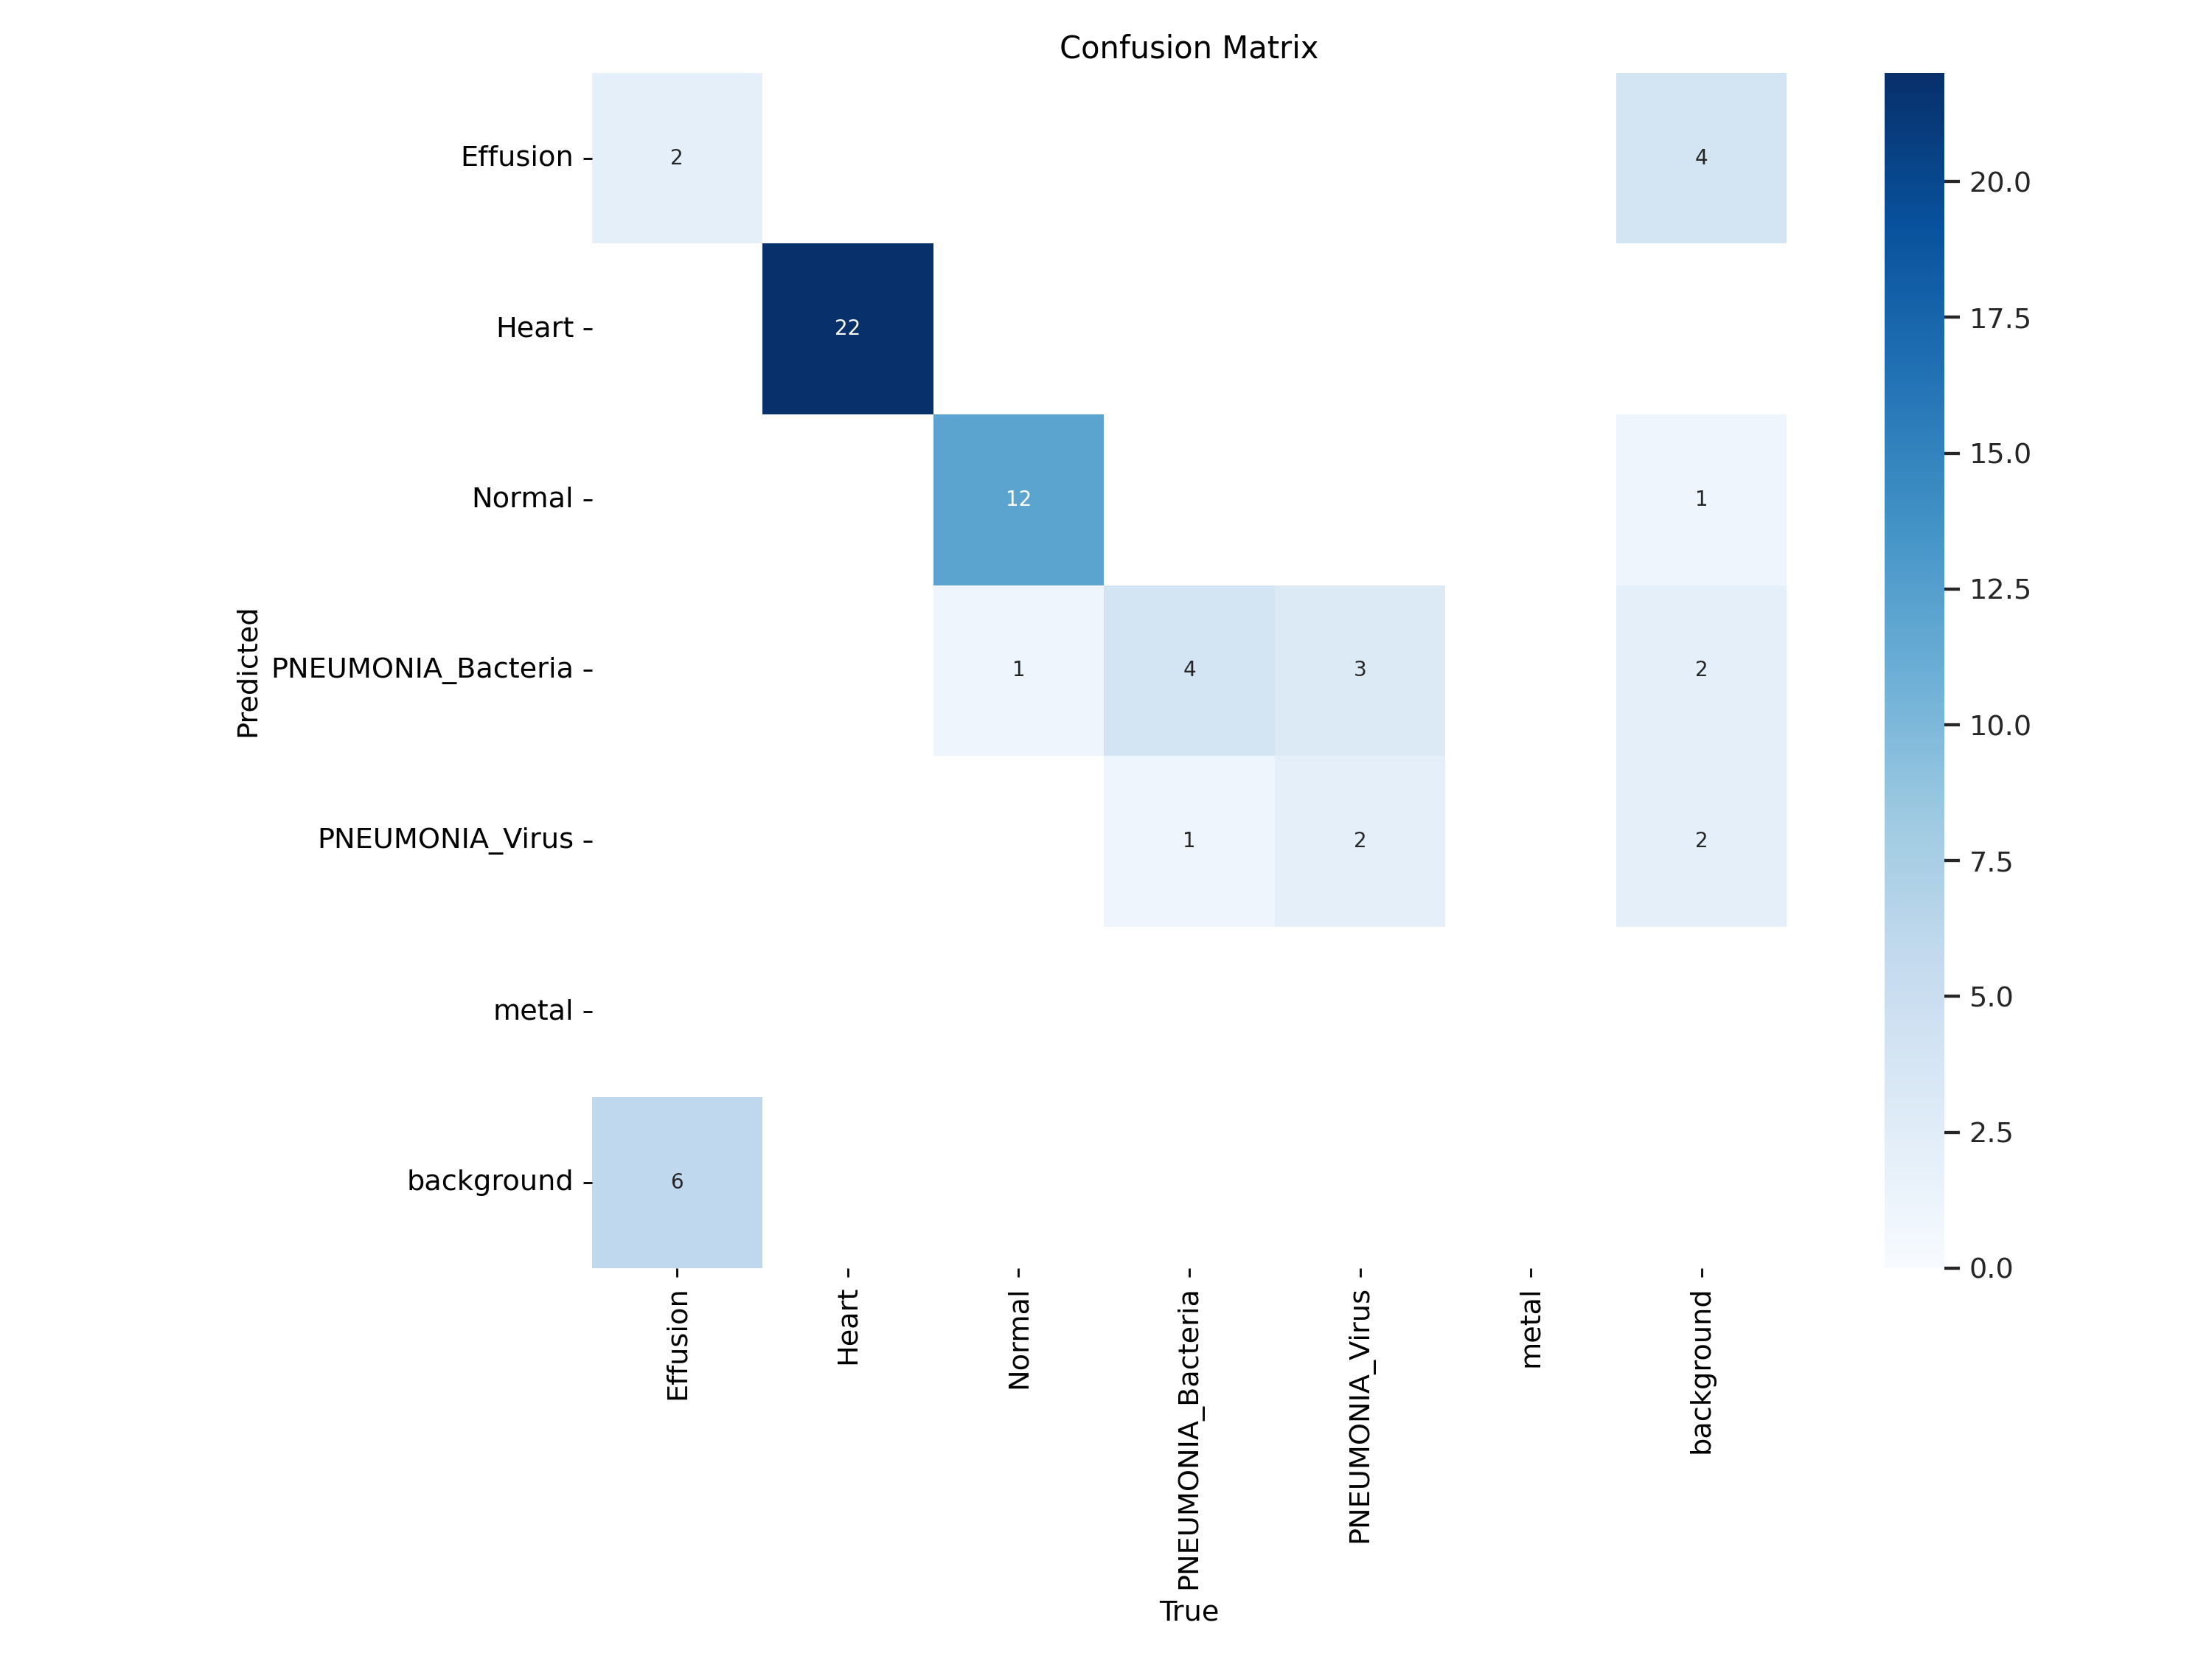

In [7]:
%cd {HOME}
Image(filename='/content/drive/MyDrive/Segmentation/runs/segment/train/confusion_matrix.png', height=600)

[Errno 2] No such file or directory: '{HOME}'
/content/drive/MyDrive/Segmentation


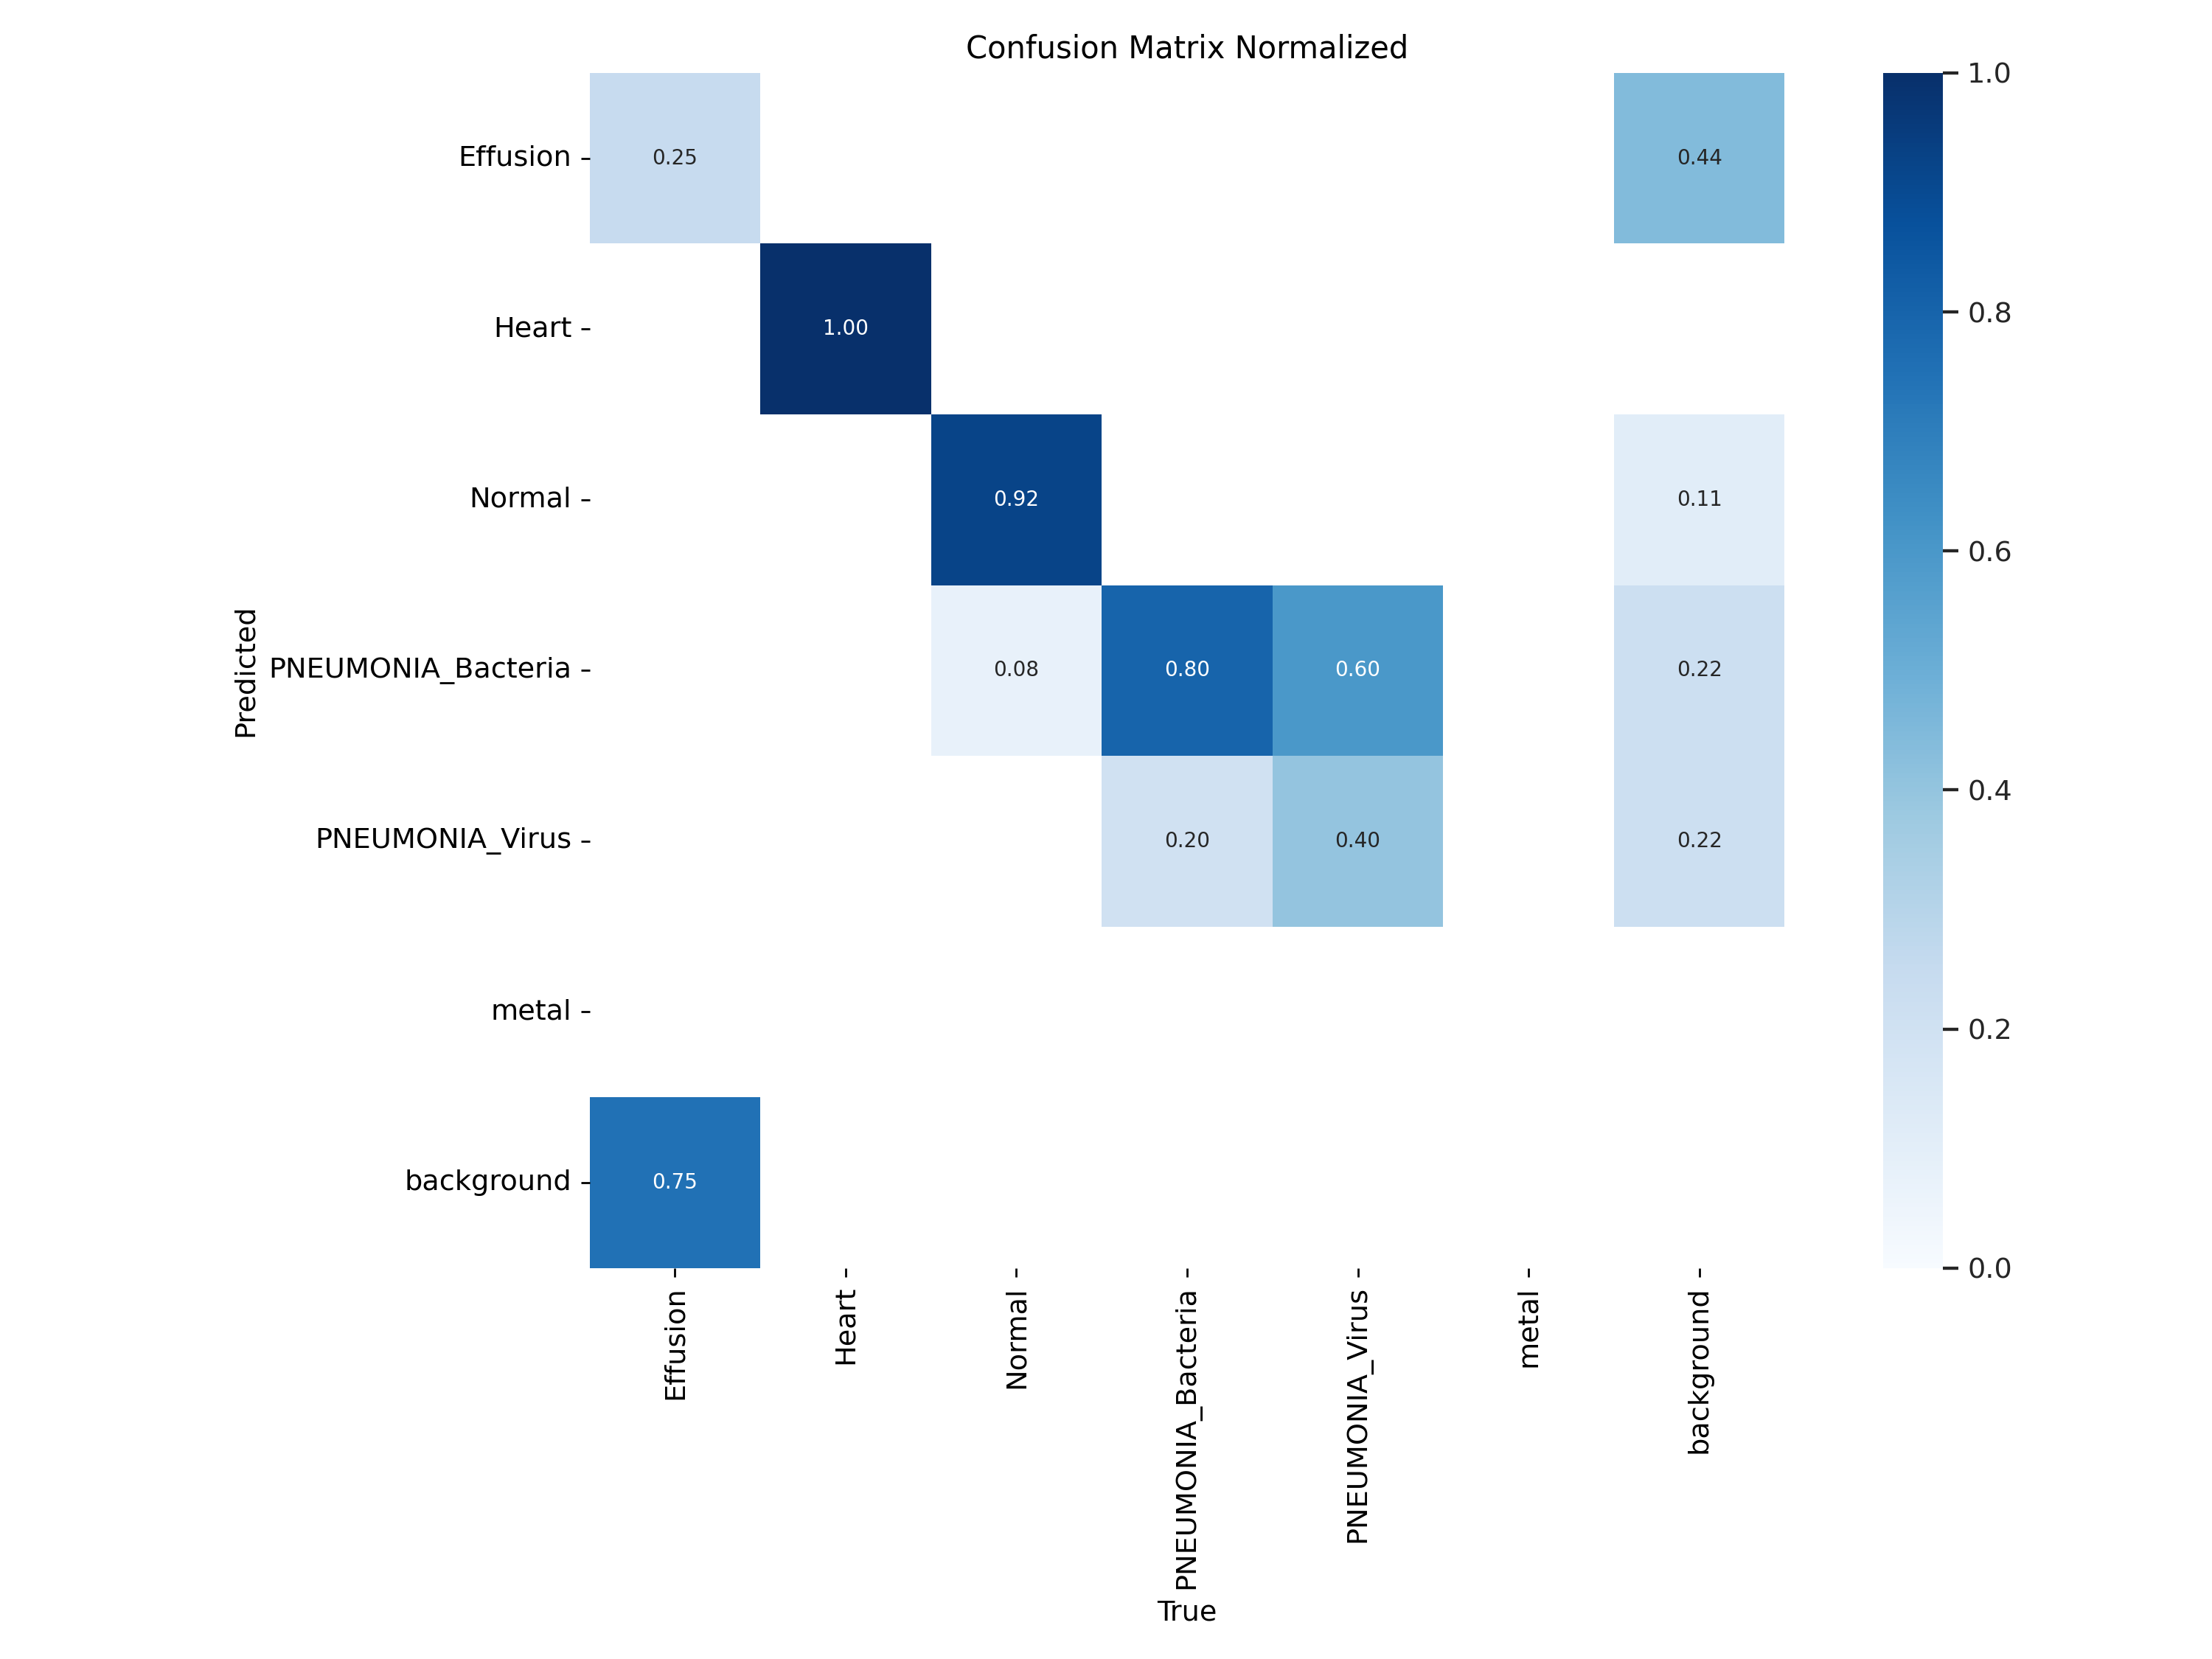

In [17]:
%cd {HOME}
Image(filename='/content/drive/MyDrive/Segmentation/runs/segment/train/confusion_matrix_normalized.png', height=600)

In [8]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Segmentation/runs/segment/train/results.csv')

In [9]:
data.head(3)

epoch           train/box_loss           train/seg_loss  \
0                        1                   1.4558                   5.3223   
1                        2                   1.4237                   5.0753   
2                        3                   1.0367                   3.5326   

            train/cls_loss           train/dfl_loss     metrics/precision(B)  \
0                   6.4628                   1.7810                  0.63694   
1                   6.4134                   1.7683                  0.45649   
2                   2.8899                   1.5194                  0.28432   

         metrics/recall(B)         metrics/mAP50(B)      metrics/mAP50-95(B)  \
0                   0.2000                  0.07268                  0.04361   
1                   0.1600                  0.09612                  0.07639   
2                   0.7743                  0.43939                  0.28767   

      metrics/precision(M)        metrics/recall(M)         metrics/mAP50(M)  \
0                  0.62272                  0.12000                  0.01708   
1                  0.44173                  0.12000                  0.03093   
2                  0.28887                  0.73339                  0.44178   

       metrics/mAP50-95(M)             val/box_loss             val/seg_loss  \
0                  0.00242                   1.5077                   7.5225   
1                  0.00360                   1.4996                   8.4185   
2                  0.22816                   1.3459                   3.2772   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                   4.5164                   2.4459                 0.000050   
1                   6.1939                   2.3848                 0.000109   
2                  13.3320                   2.0518                 0.000168   

                    lr/pg1                   lr/pg2  
0                 0.000050                 0.000050  
1                 0.000109                 0.000109  
2                 0.000168                 0.000168

In [10]:
data.tail(3)

epoch           train/box_loss  \
132                      133                  0.54241   
133                      134                  0.53277   
134                      135                  0.49279   

              train/seg_loss           train/cls_loss  \
132                   1.2038                  0.53284   
133                   1.0679                  0.61013   
134                   1.0145                  0.47564   

              train/dfl_loss     metrics/precision(B)  \
132                   1.0482                  0.67962   
133                   1.0641                  0.65678   
134                   1.0120                  0.64291   

           metrics/recall(B)         metrics/mAP50(B)  \
132                  0.80378                  0.76421   
133                  0.85677                  0.76282   
134                  0.83500                  0.75343   

         metrics/mAP50-95(B)     metrics/precision(M)  \
132                  0.65305                  0.64692   
133                  0.65852                  0.62837   
134                  0.65469                  0.59538   

           metrics/recall(M)         metrics/mAP50(M)  \
132                  0.75466                  0.73850   
133                  0.80713                  0.74219   
134                  0.78500                  0.73670   

         metrics/mAP50-95(M)             val/box_loss  \
132                  0.48818                  0.75718   
133                  0.48668                  0.76286   
134                  0.48410                  0.76098   

                val/seg_loss             val/cls_loss  \
132                   1.7925                  0.75472   
133                   1.8166                  0.77860   
134                   1.8174                  0.78811   

                val/dfl_loss                   lr/pg0  \
132                   1.3274                 0.000135   
133                   1.3395                 0.000129   
134                   1.3458                 0.000122   

                      lr/pg1                   lr/pg2  
132                 0.000135                 0.000135  
133                 0.000129                 0.000129  
134                 0.000122                 0.000122

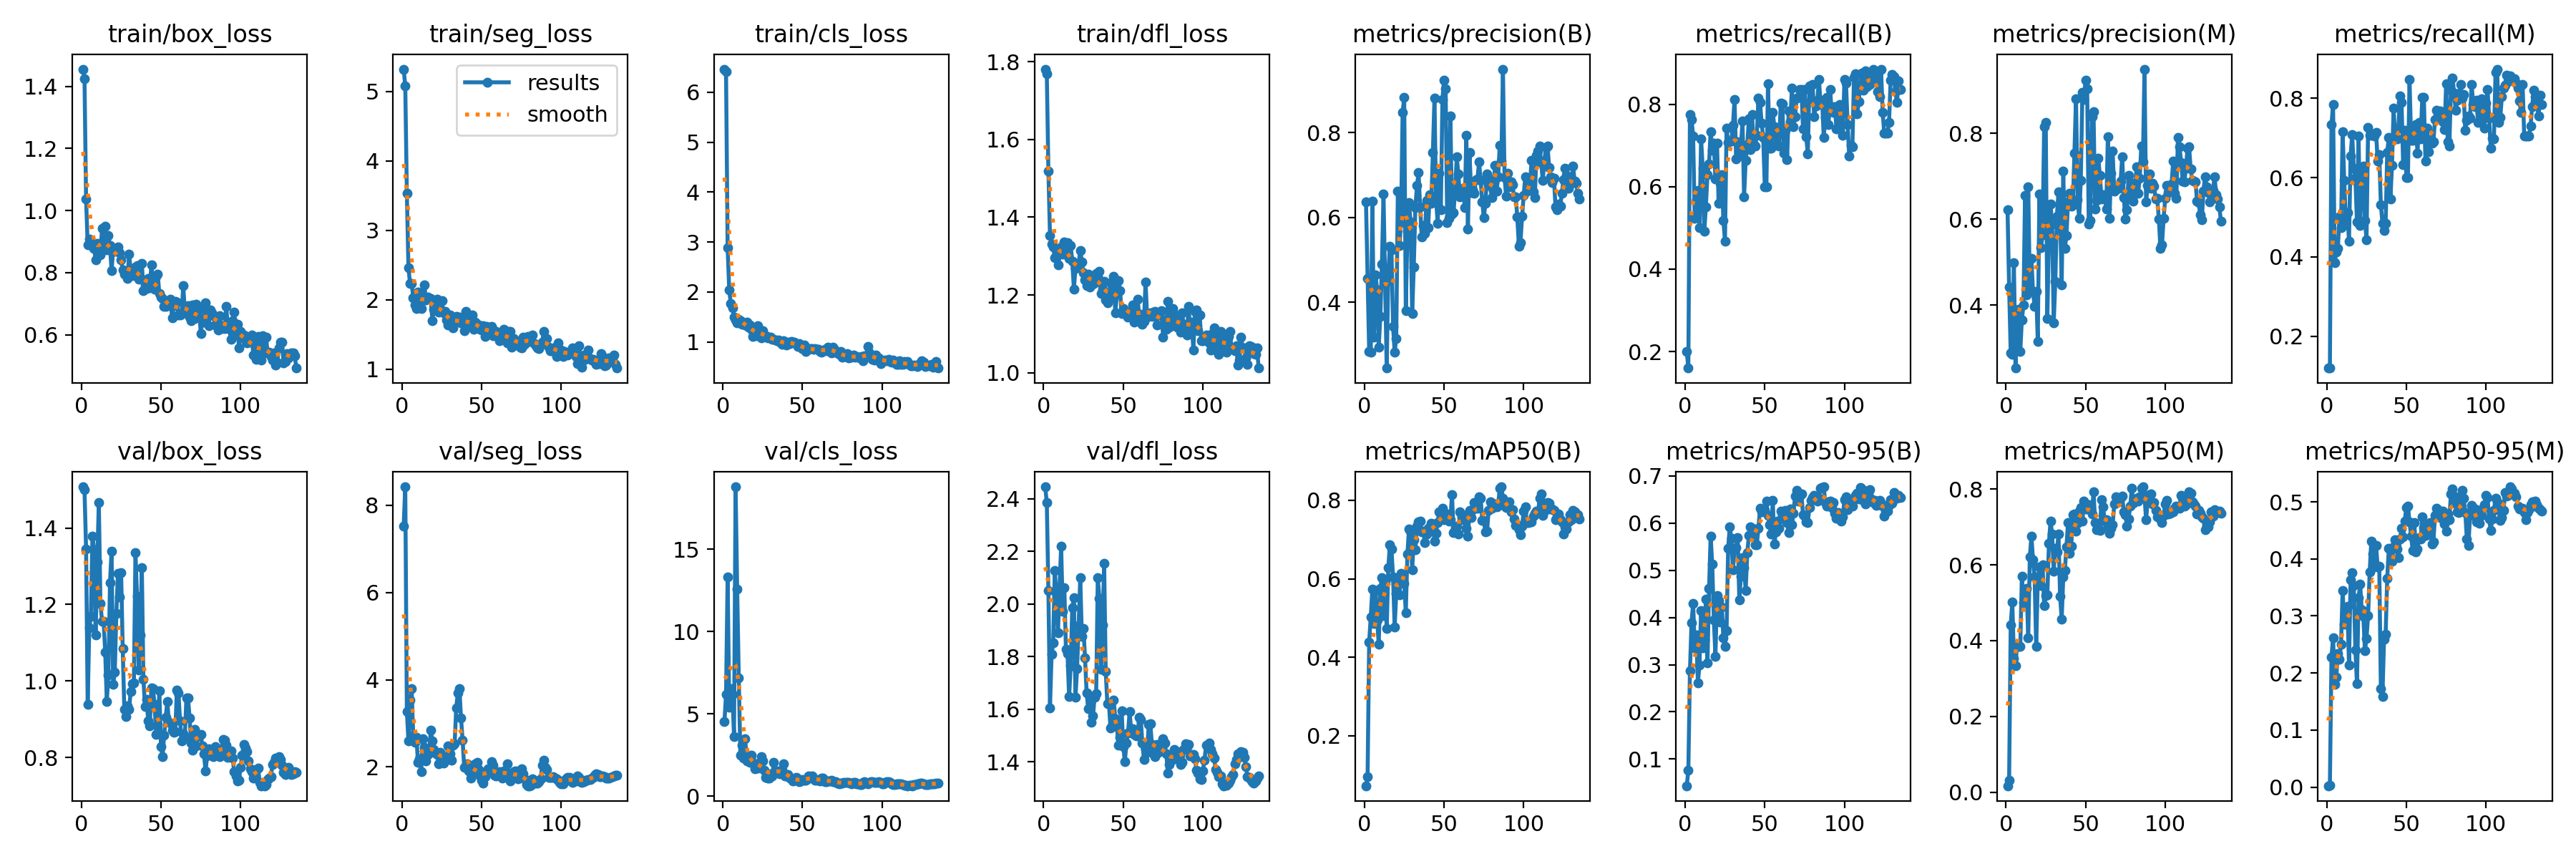

In [11]:
Image(filename='/content/drive/MyDrive/Segmentation/runs/segment/train/results.png', height=600)

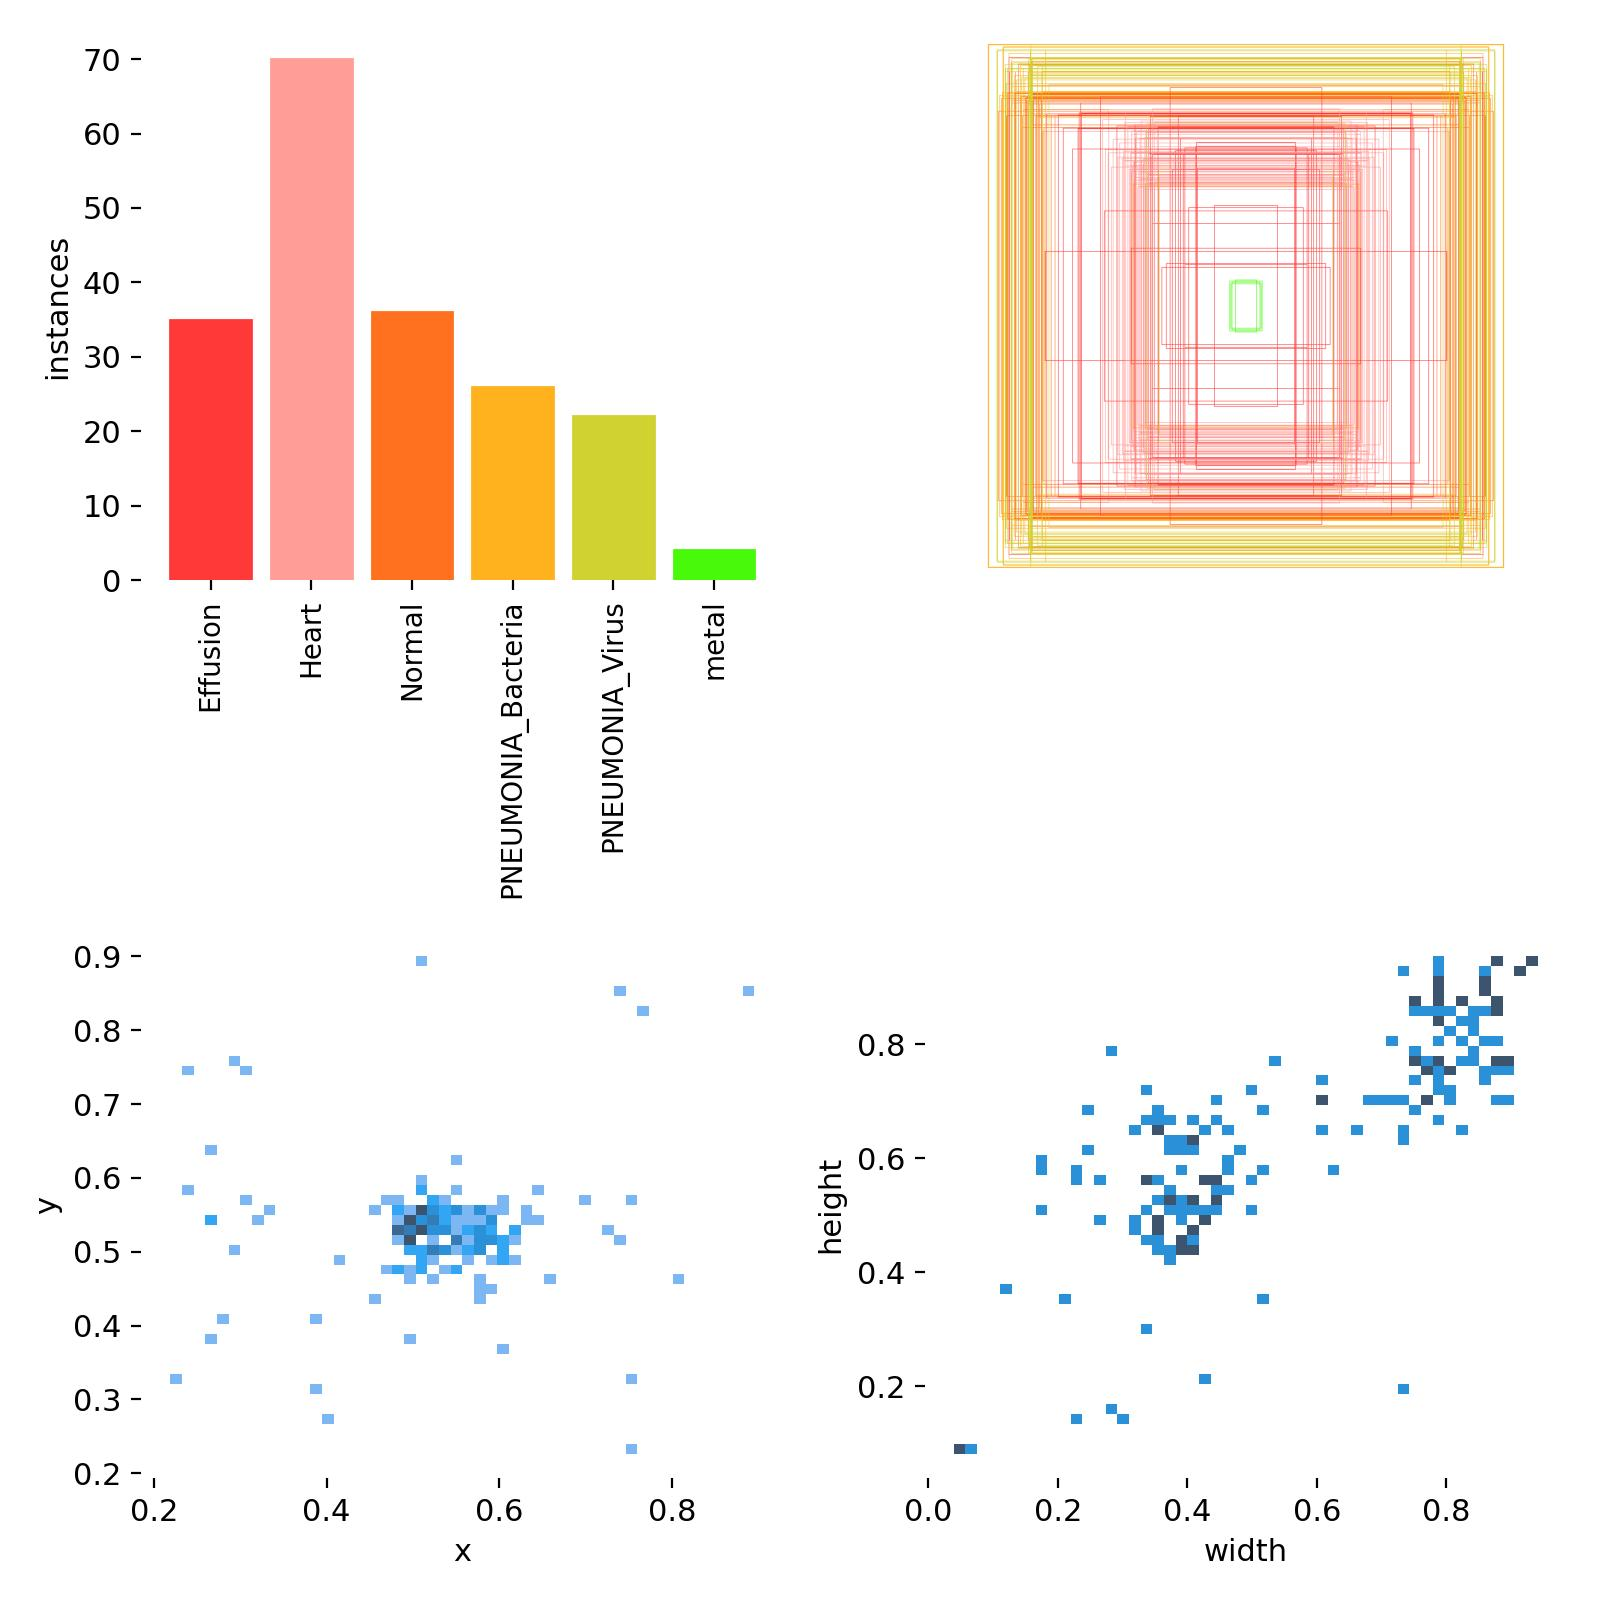

In [12]:
Image(filename='/content/drive/MyDrive/Segmentation/runs/segment/train/labels.jpg', height=600)

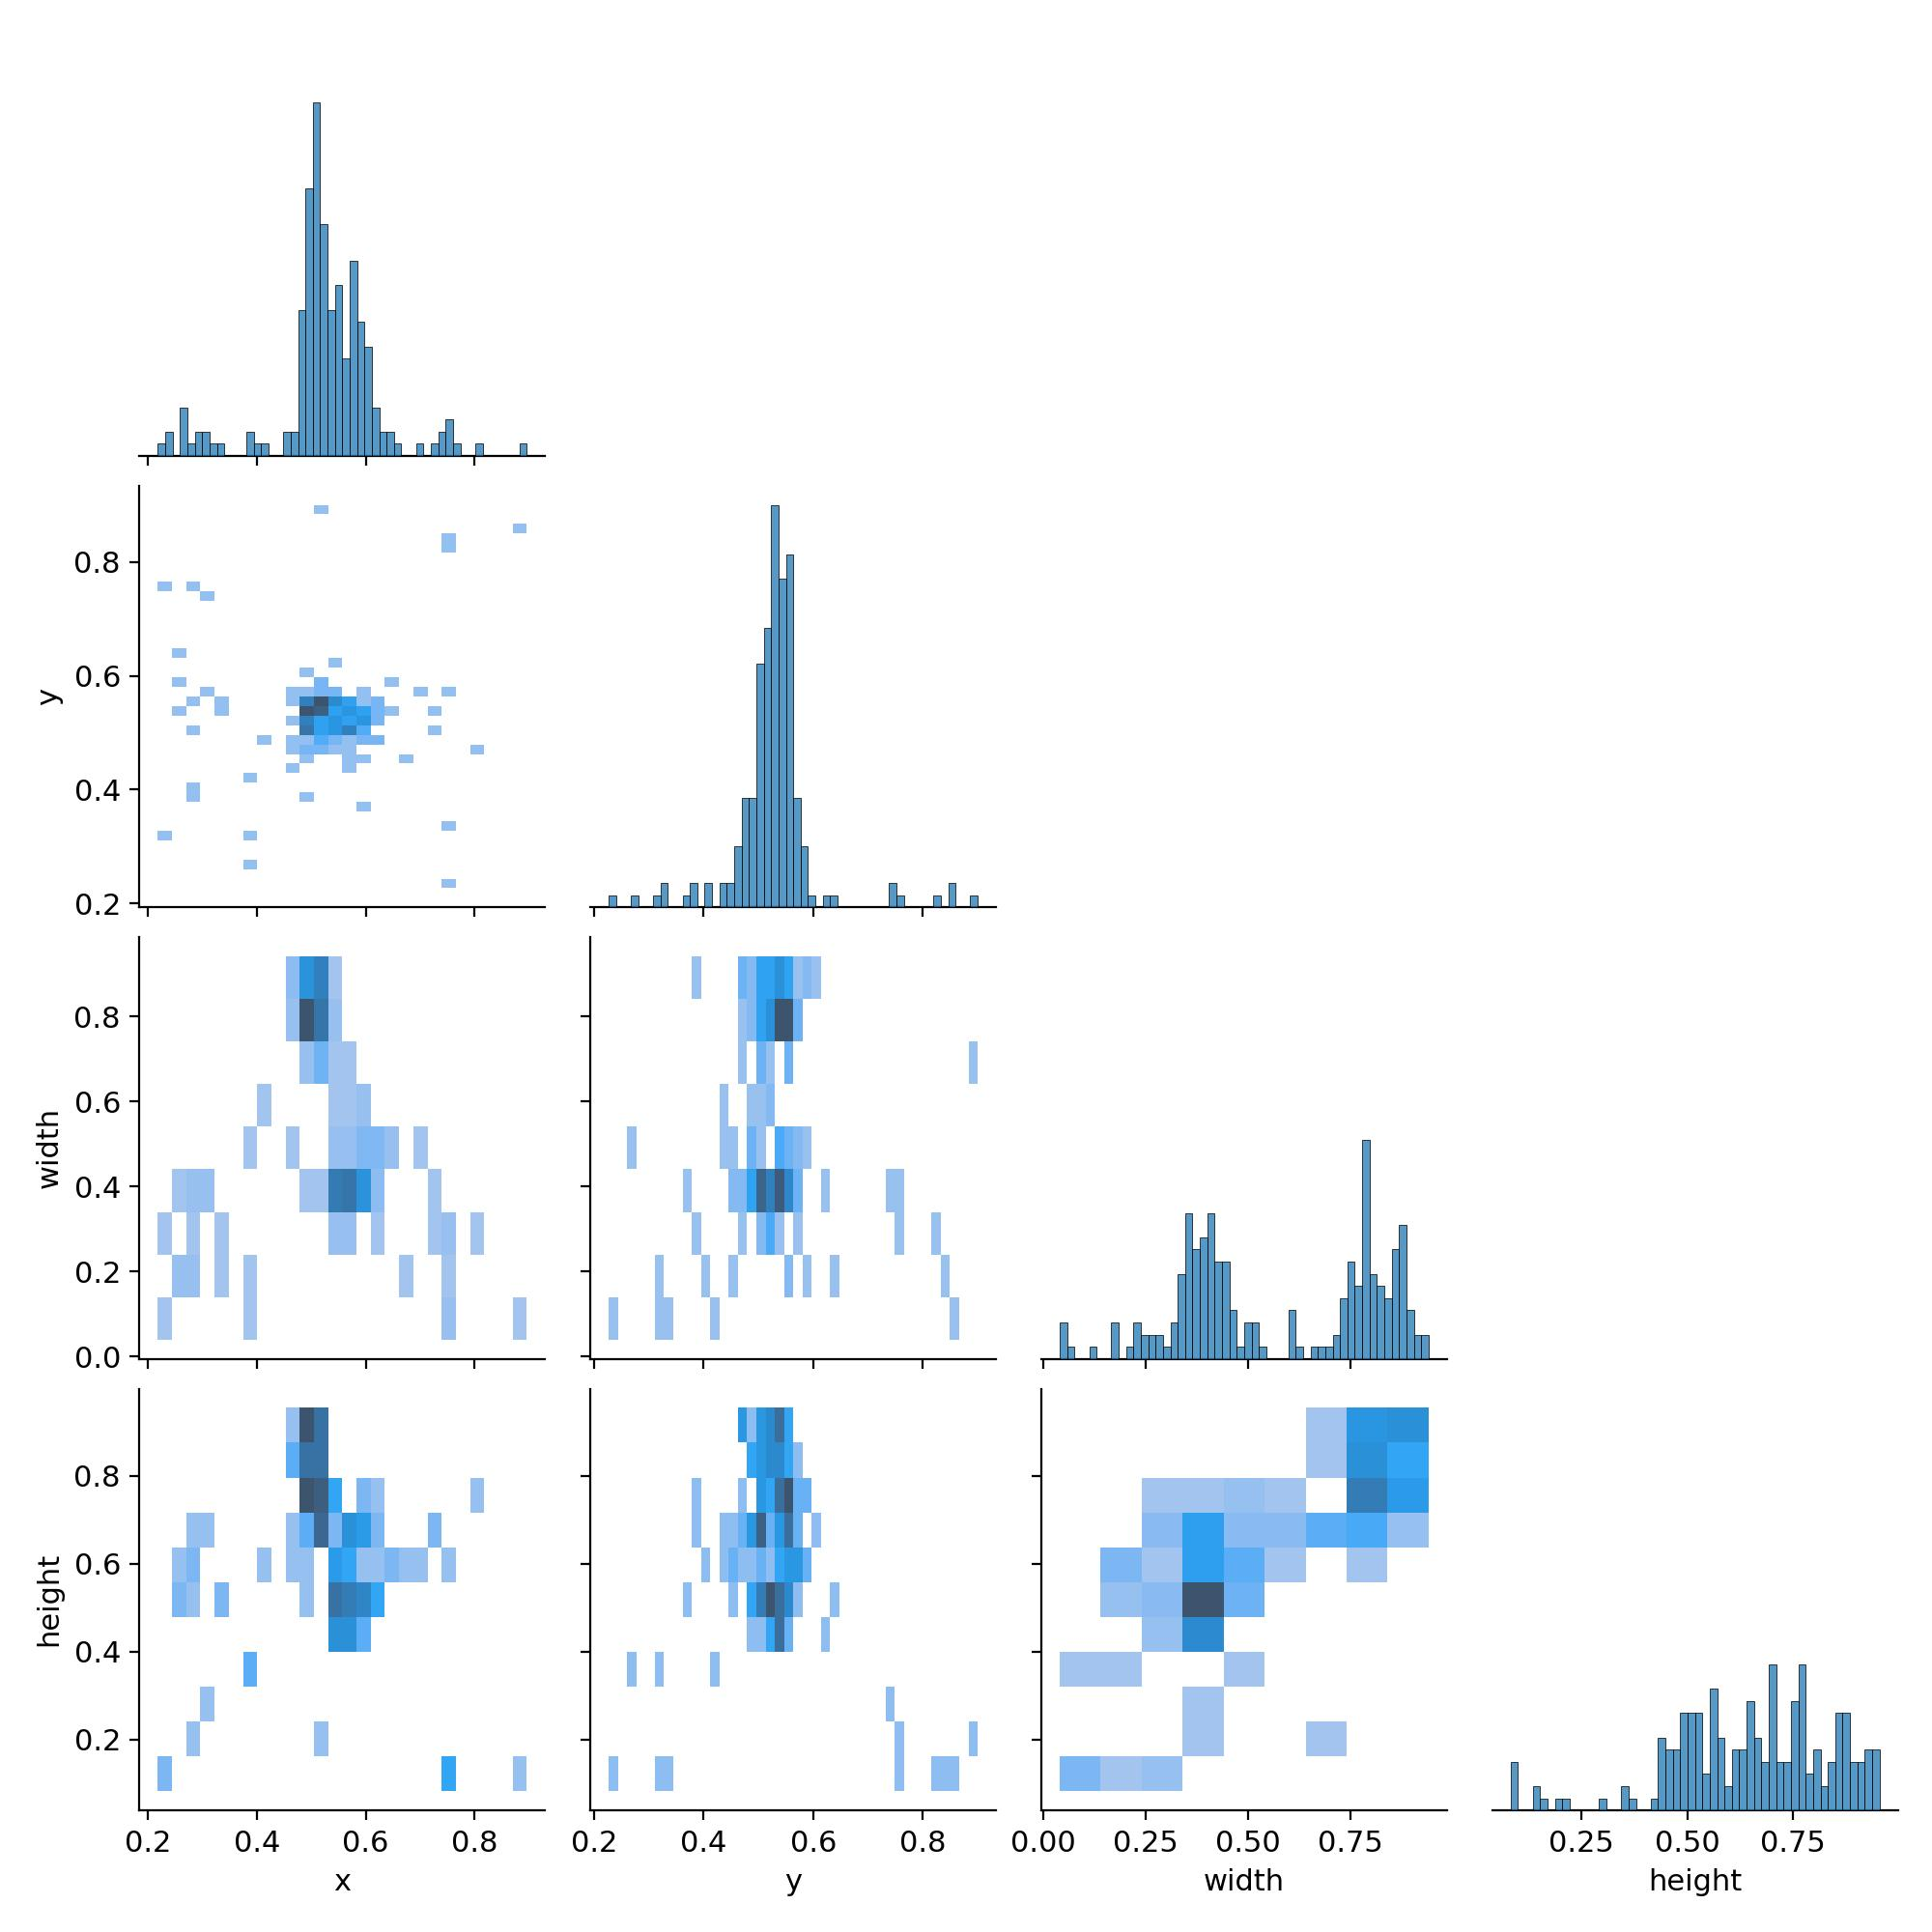

In [14]:
Image(filename='/content/drive/MyDrive/Segmentation/runs/segment/train/labels_correlogram.jpg', height=600)

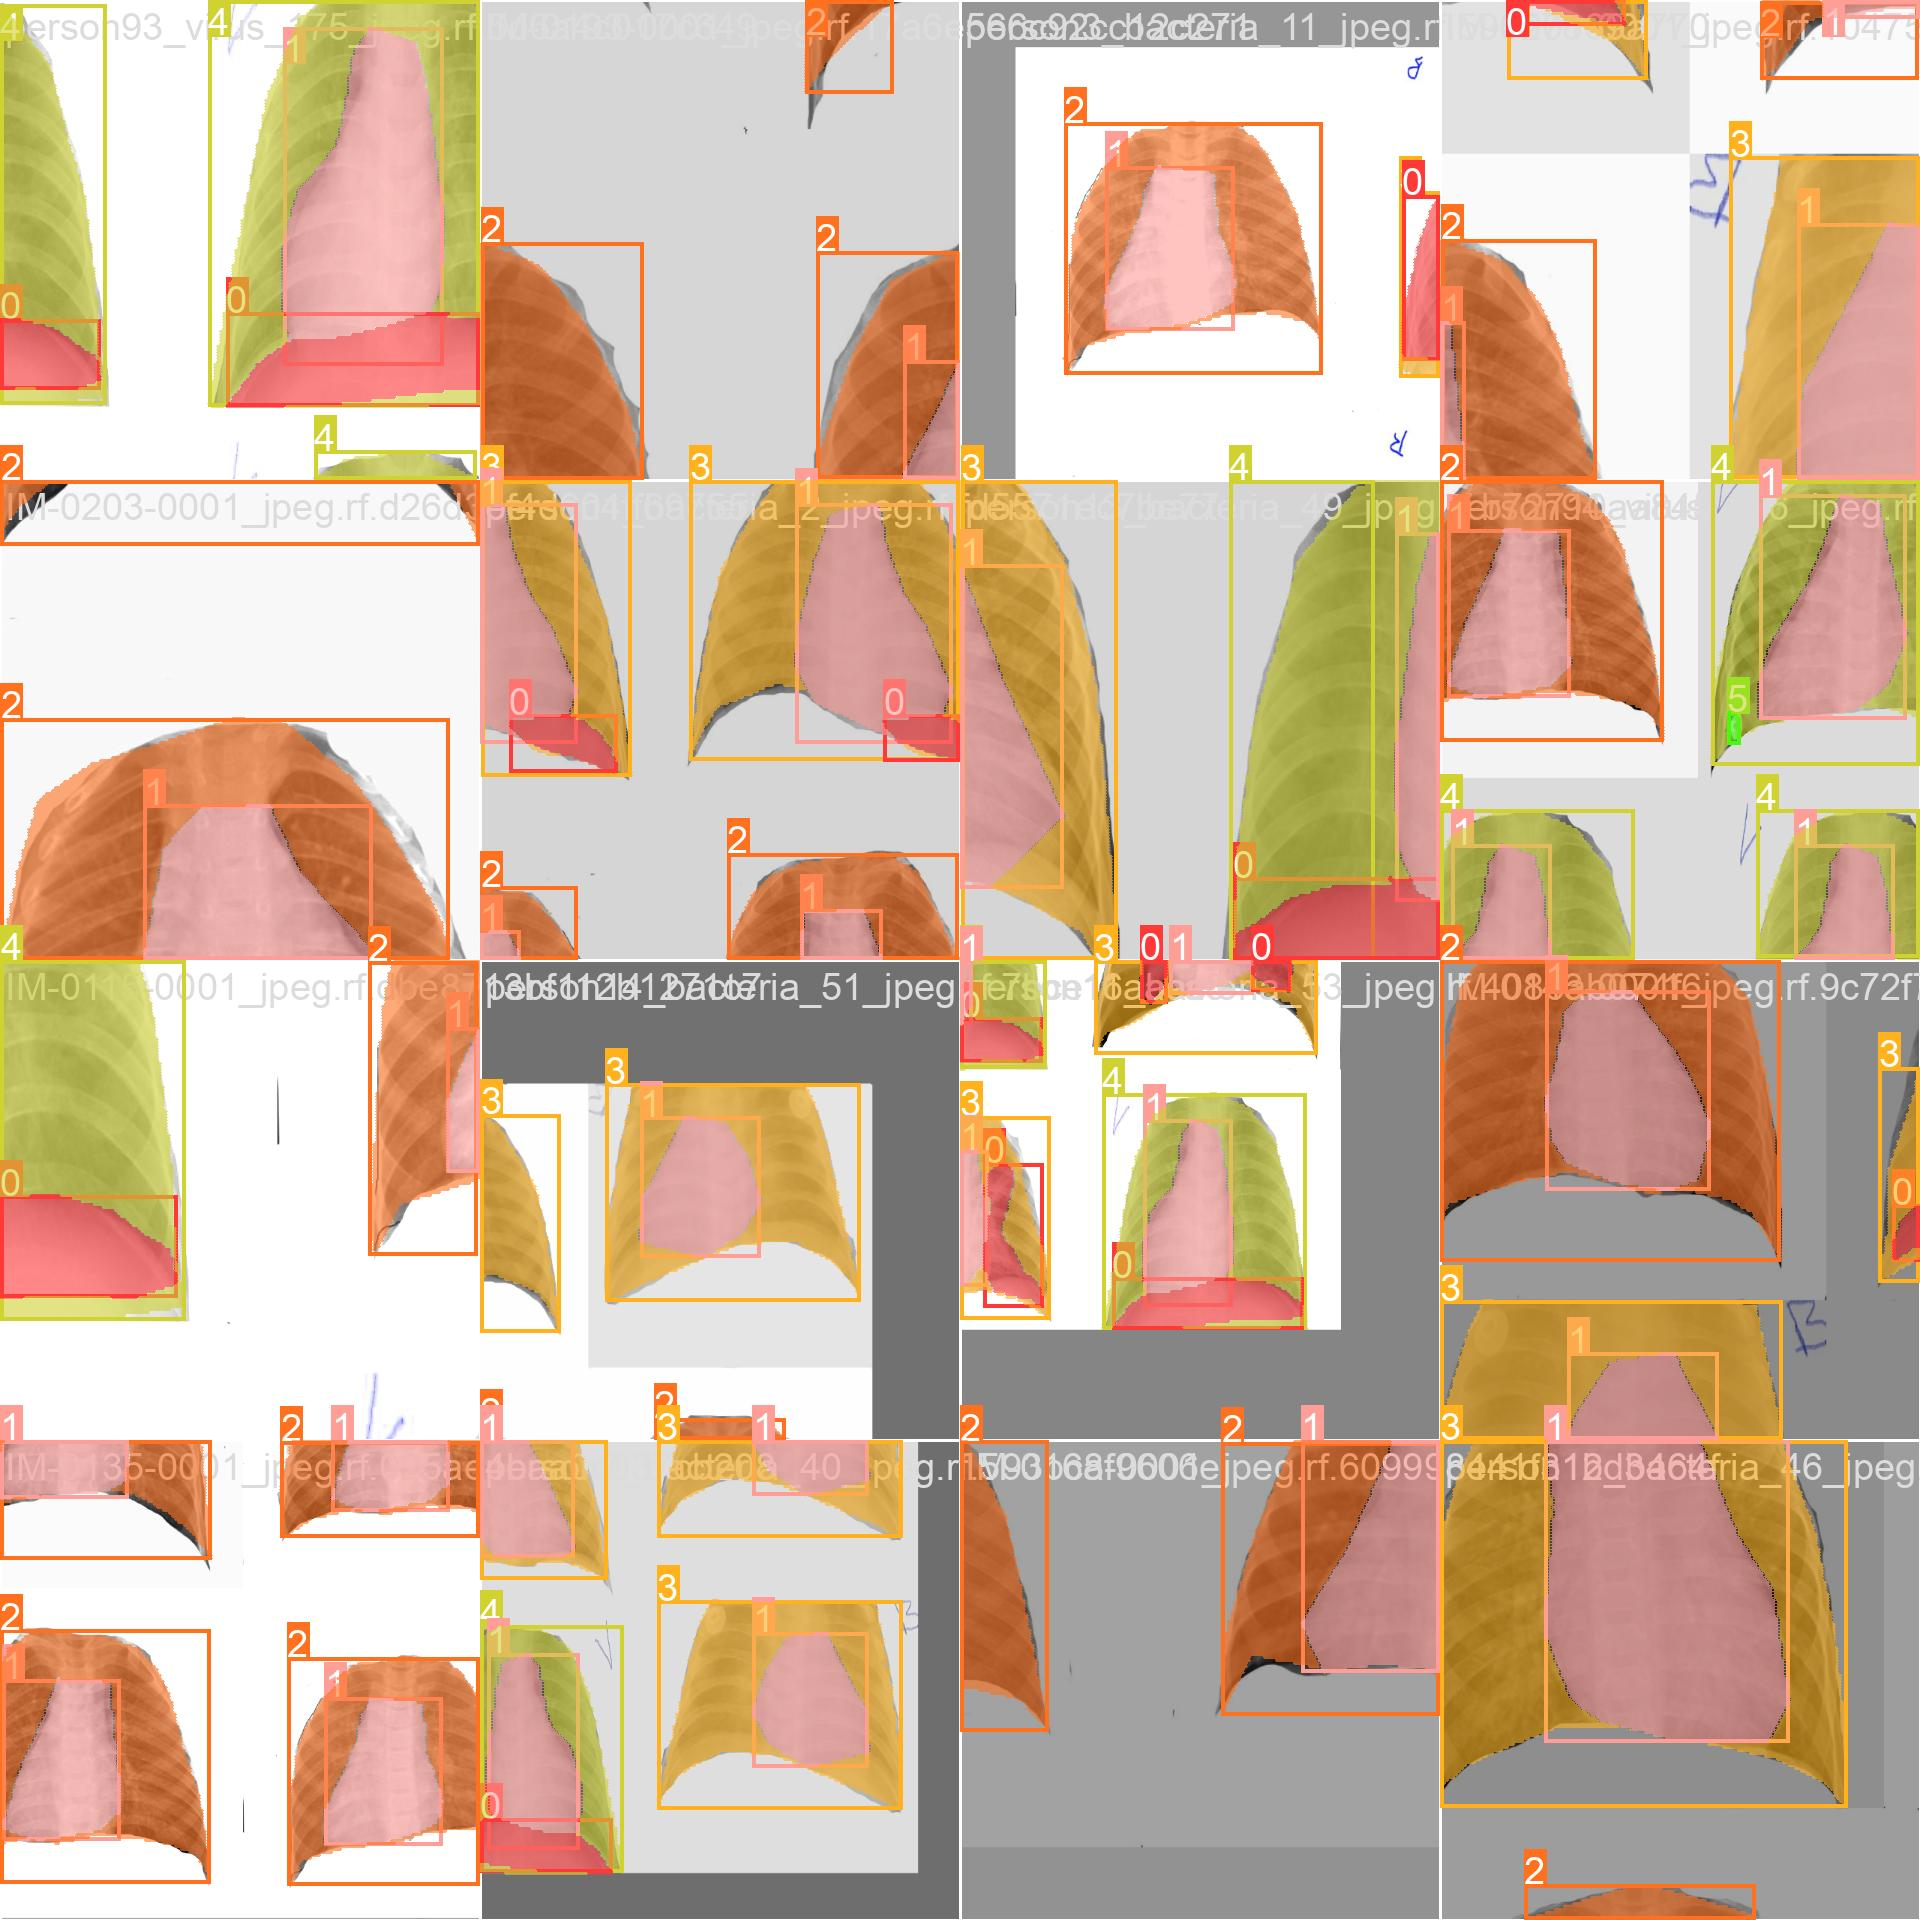

In [15]:
Image(filename='/content/drive/MyDrive/Segmentation/runs/segment/train/train_batch1.jpg', height=600)

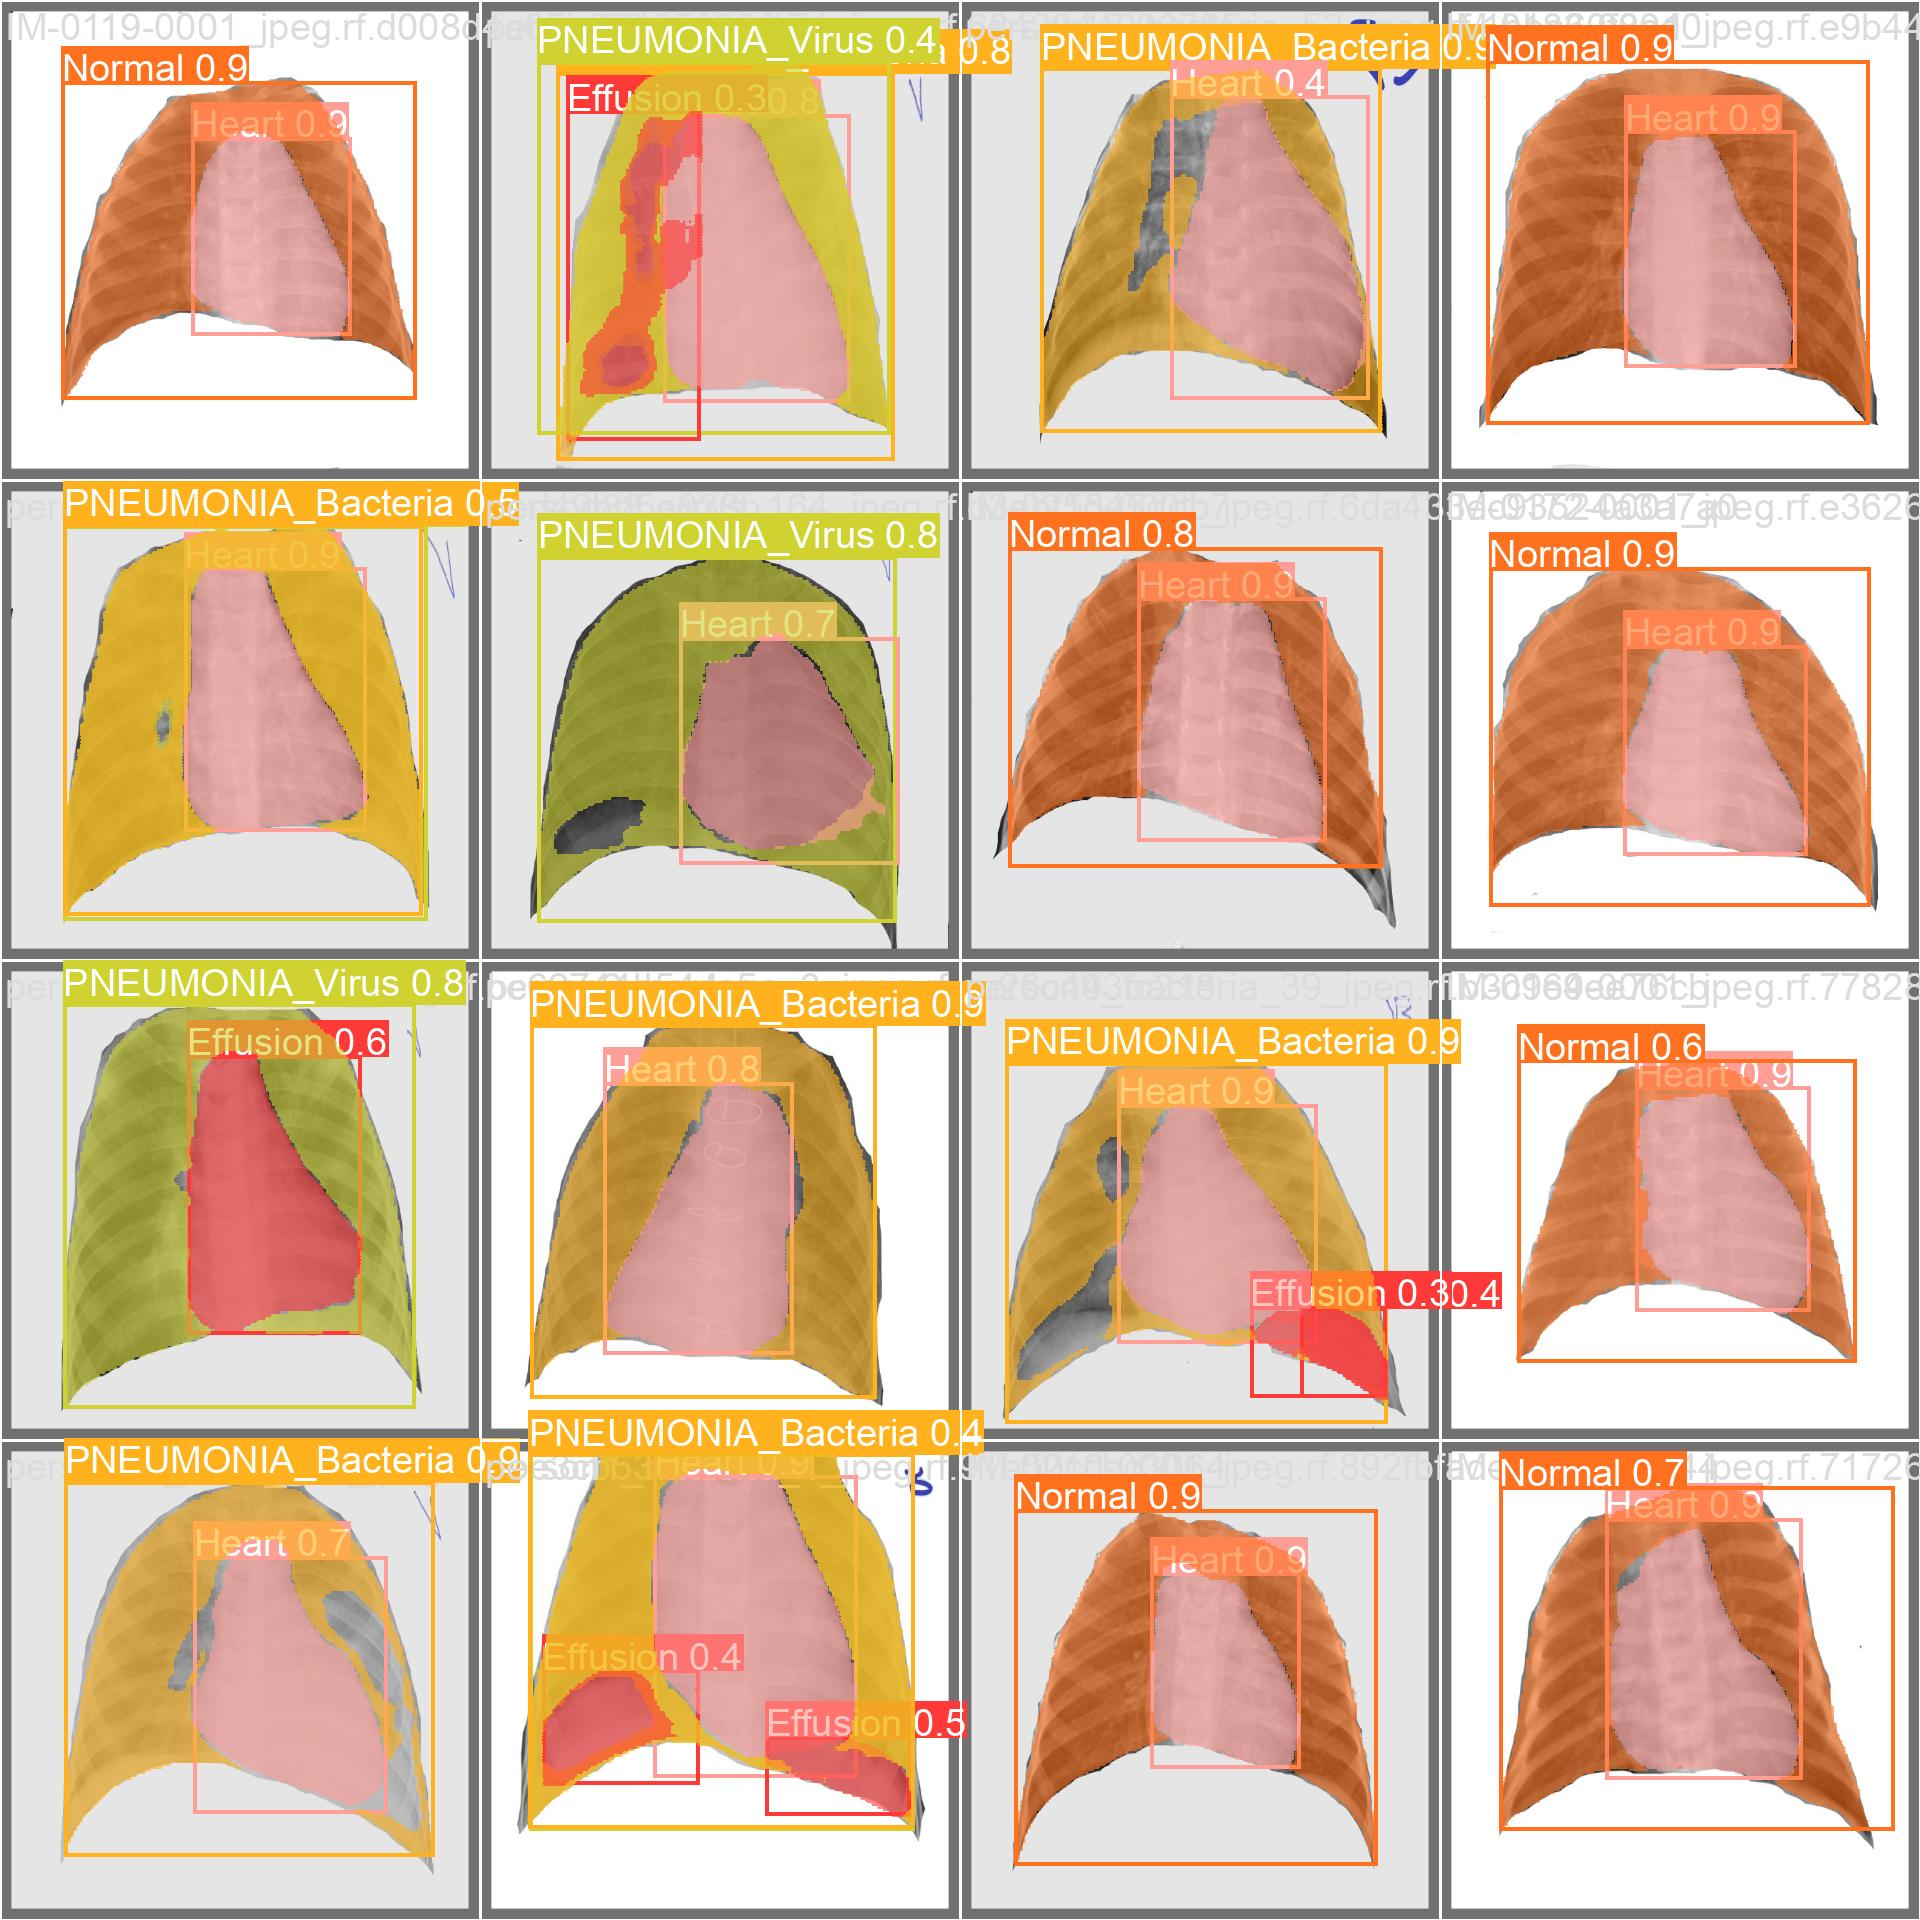

In [16]:
Image(filename='/content/drive/MyDrive/Segmentation/runs/segment/train/val_batch0_pred.jpg', height=600)

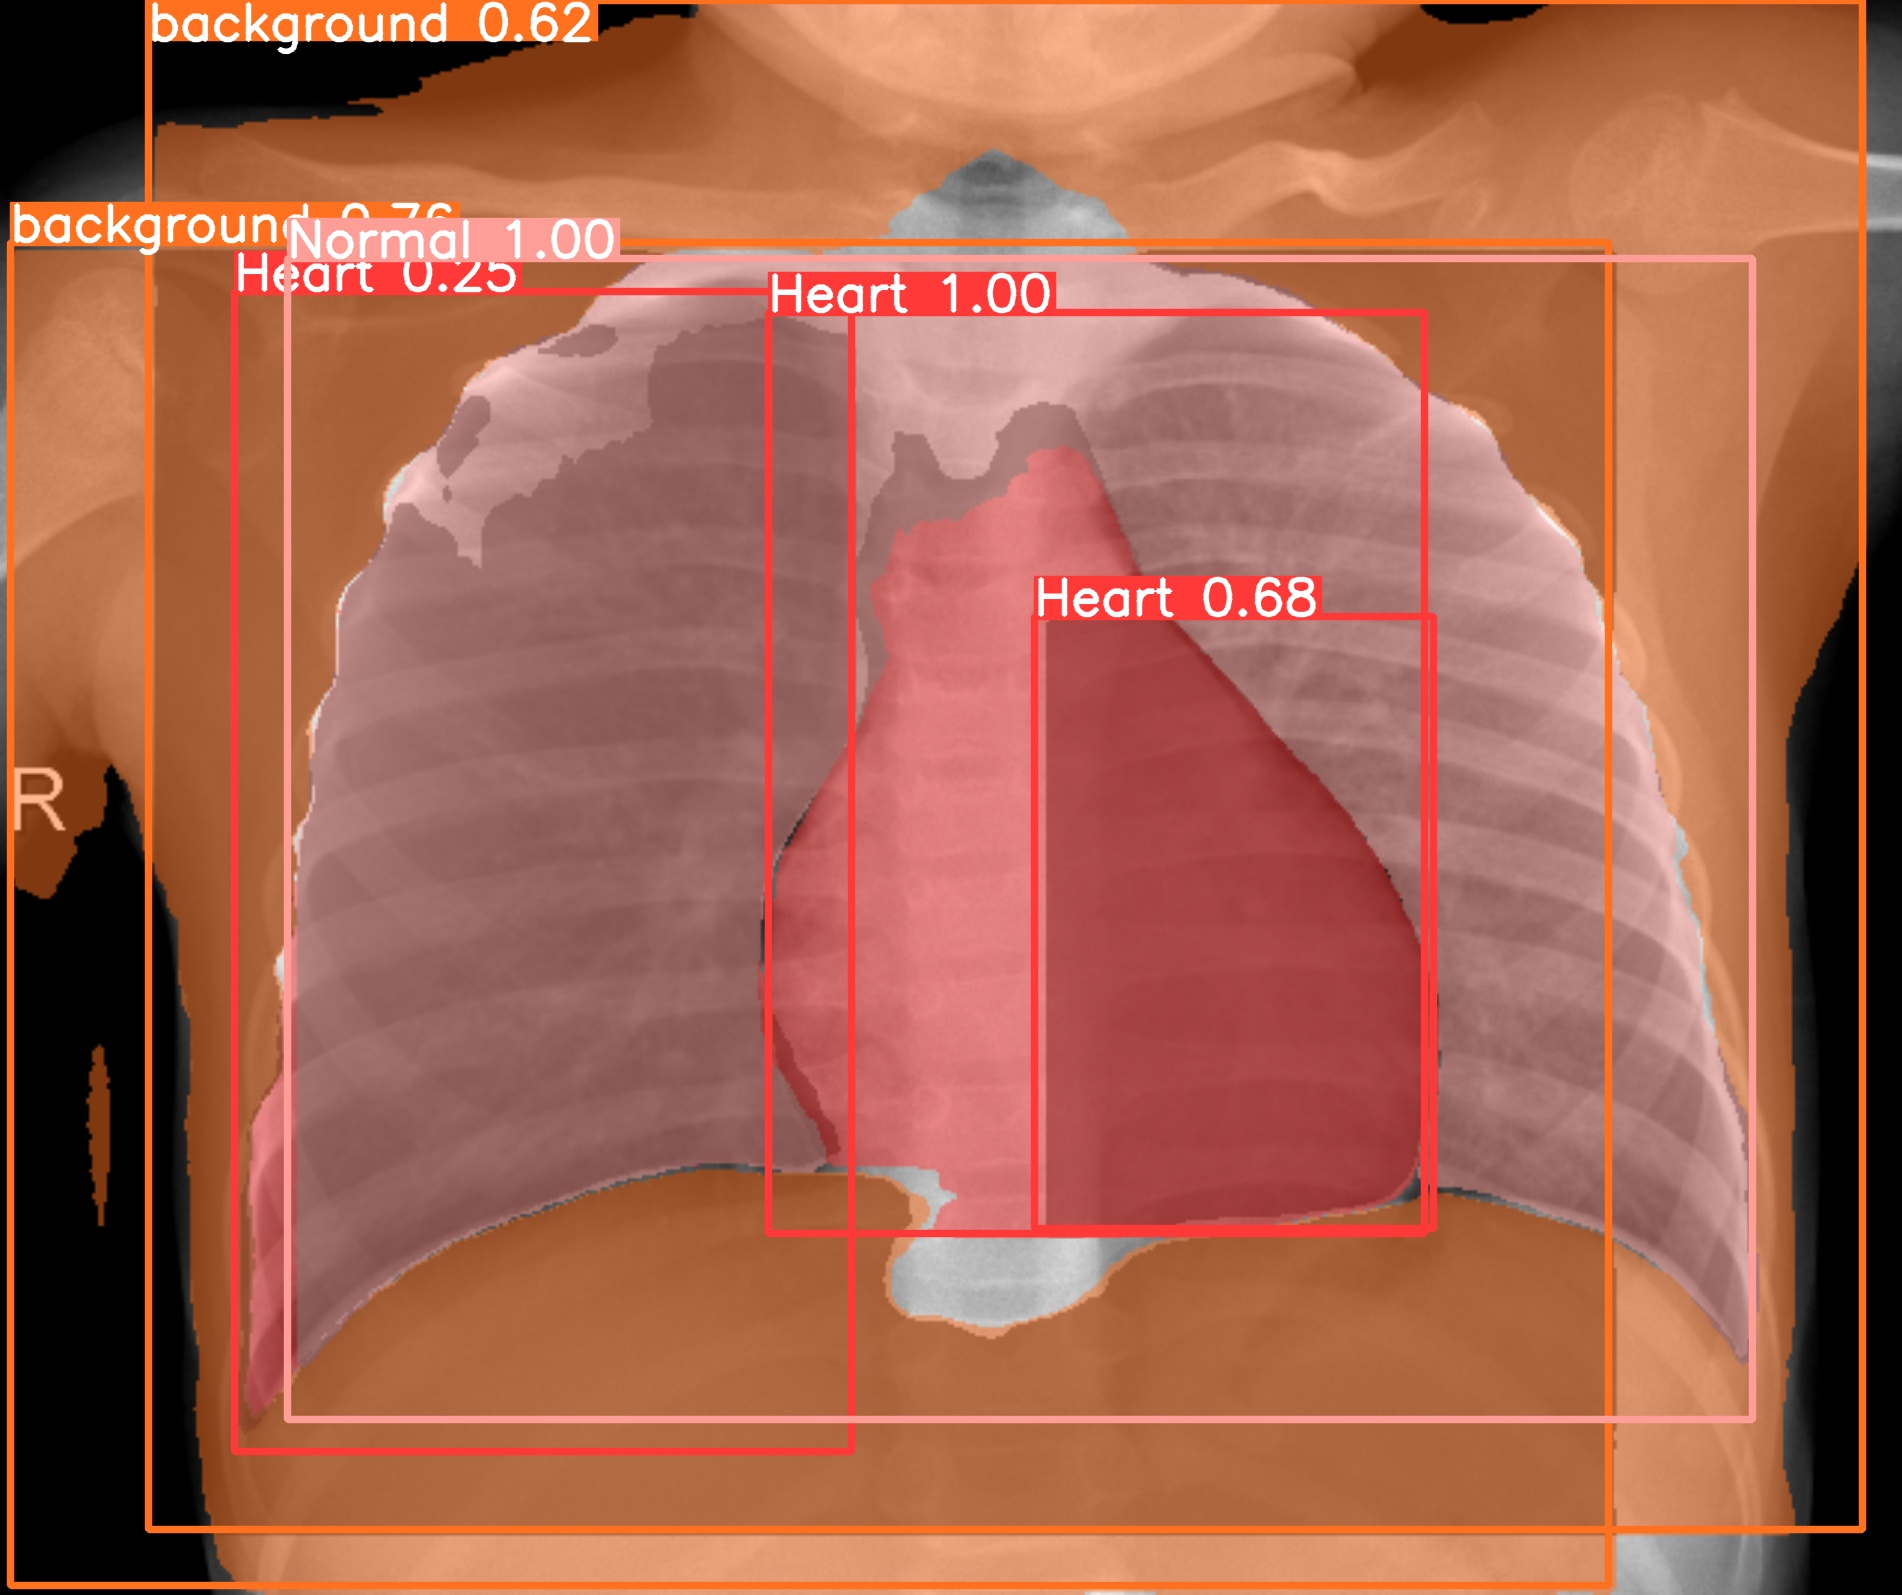

In [ ]:
Image(filename='/content/drive/MyDrive/Segmentation/runs/segment/predict/IM-0538-0001.jpeg', height=600)

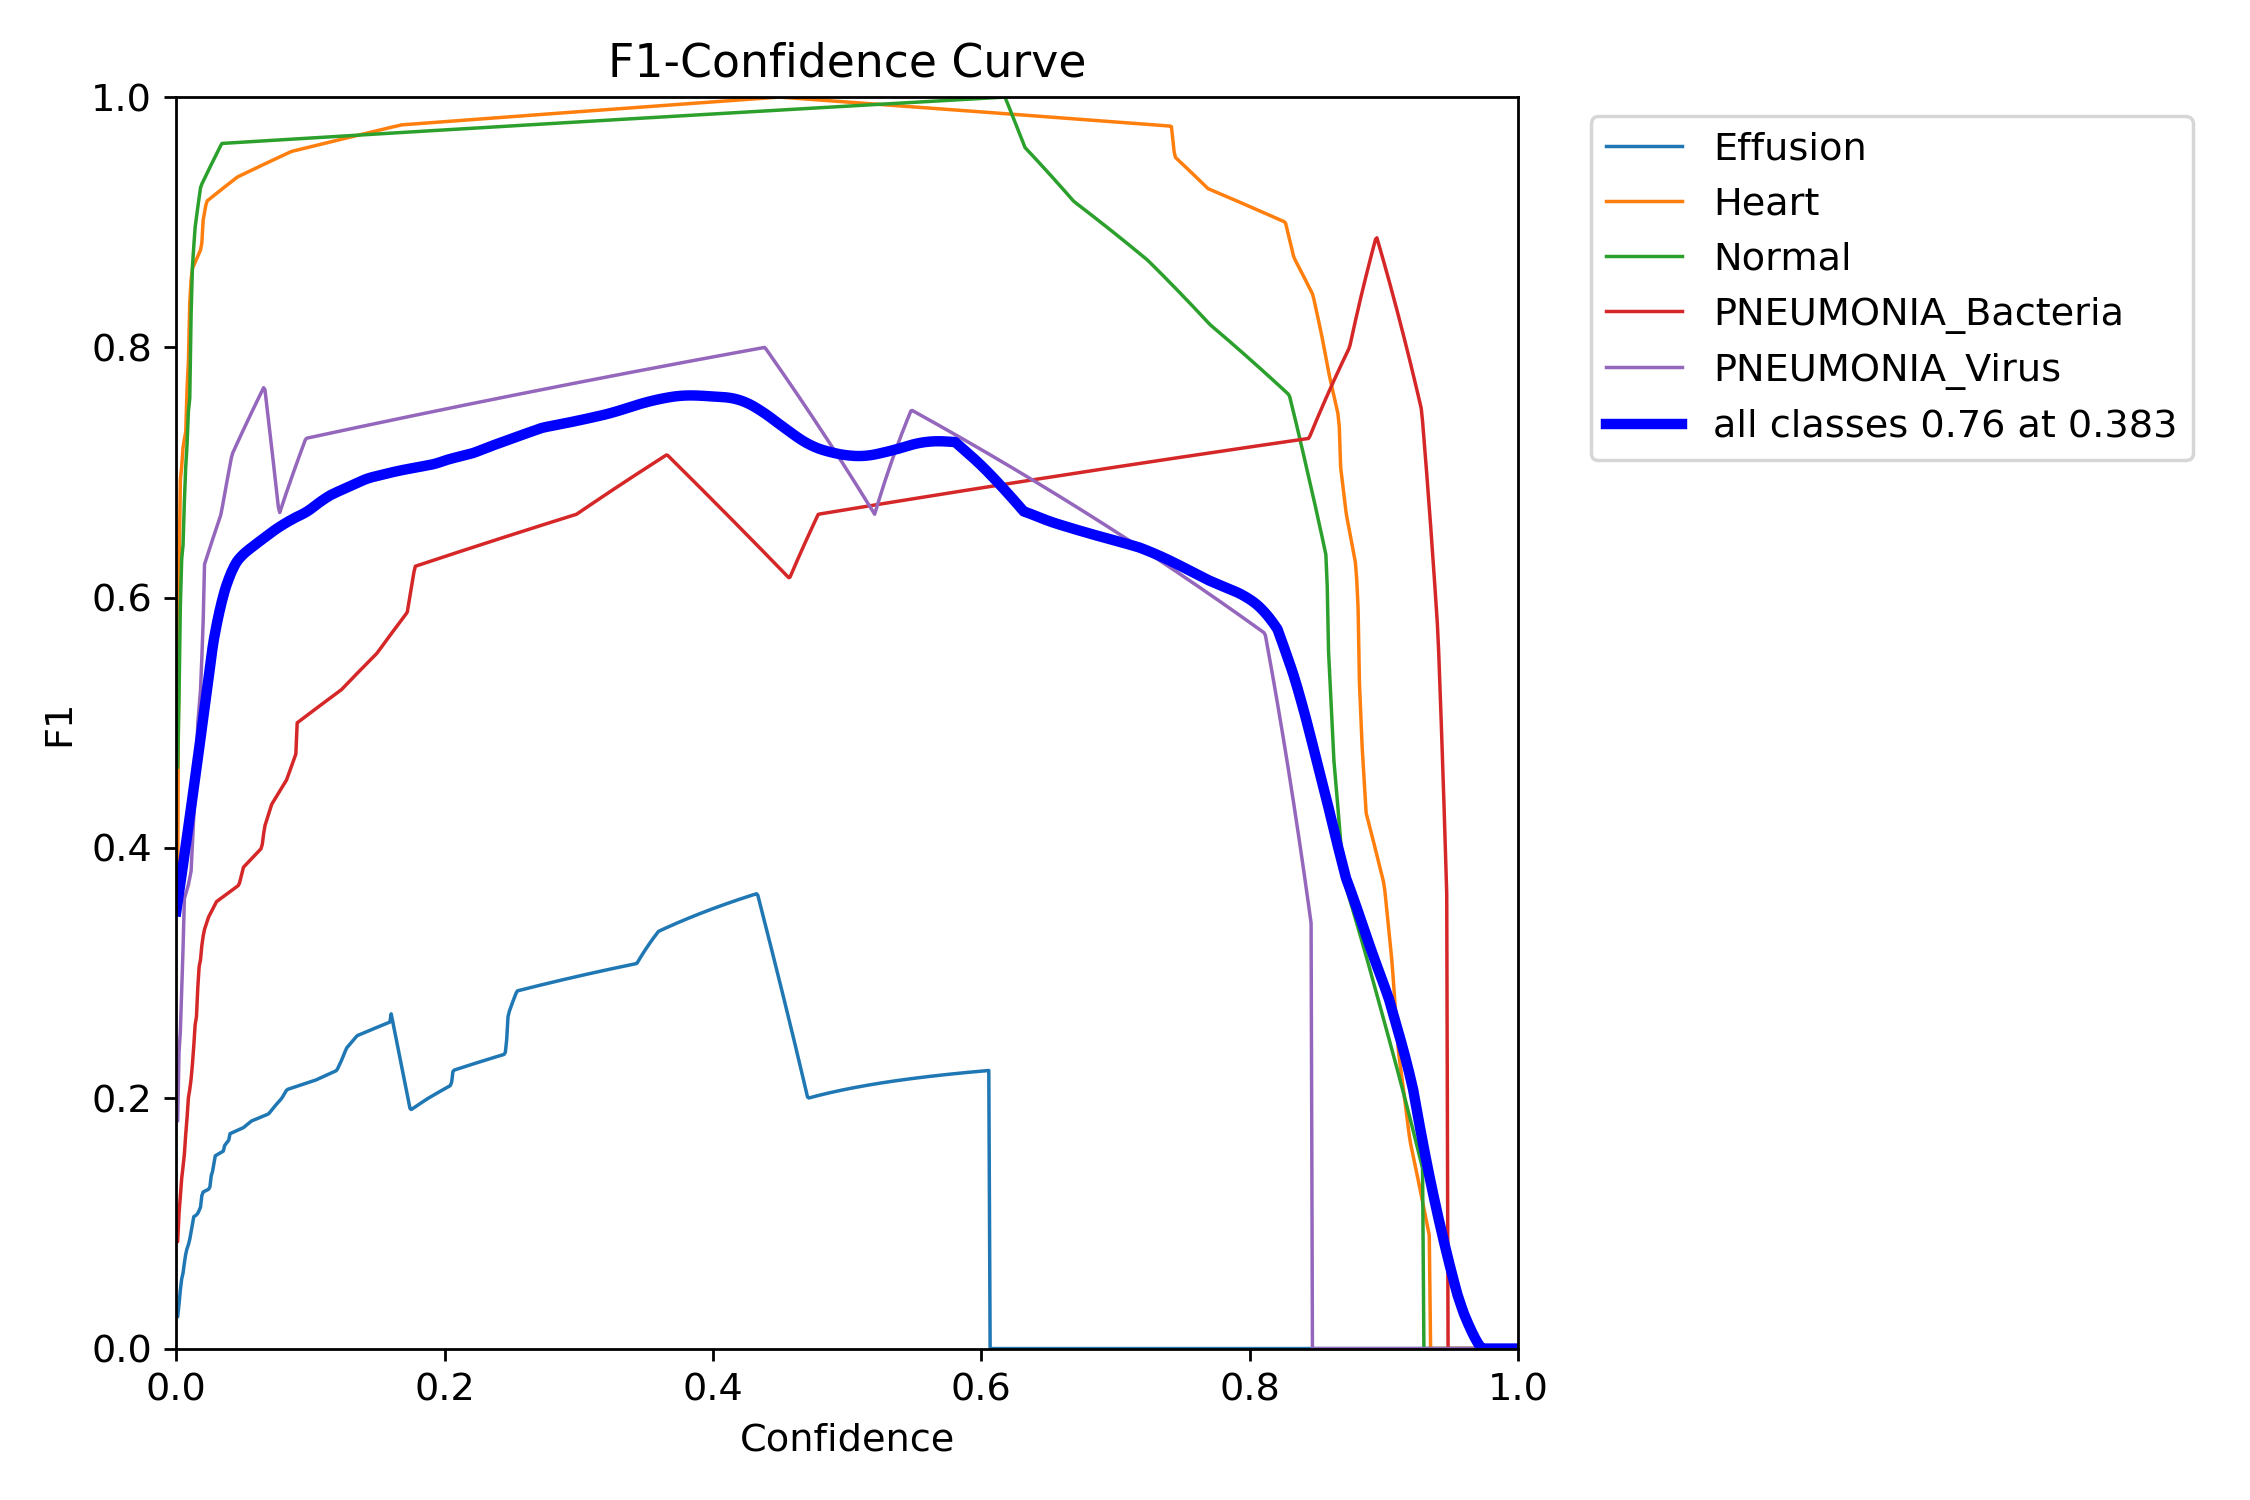

In [18]:
Image(filename='/content/drive/MyDrive/Segmentation/runs/segment/train/MaskF1_curve.png', height=600)

In [21]:
predict=model1.predict('/content/drive/MyDrive/Segmentation/person14_bacteria_51.jpeg', save=True,save_txt = True)


image 1/1 /content/drive/MyDrive/Segmentation/person14_bacteria_51.jpeg: 448x640 1 Heart, 1 PNEUMONIA_Bacteria, 16.5ms
Speed: 3.6ms preprocess, 16.5ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict2
1 label saved to runs/segment/predict2/labels


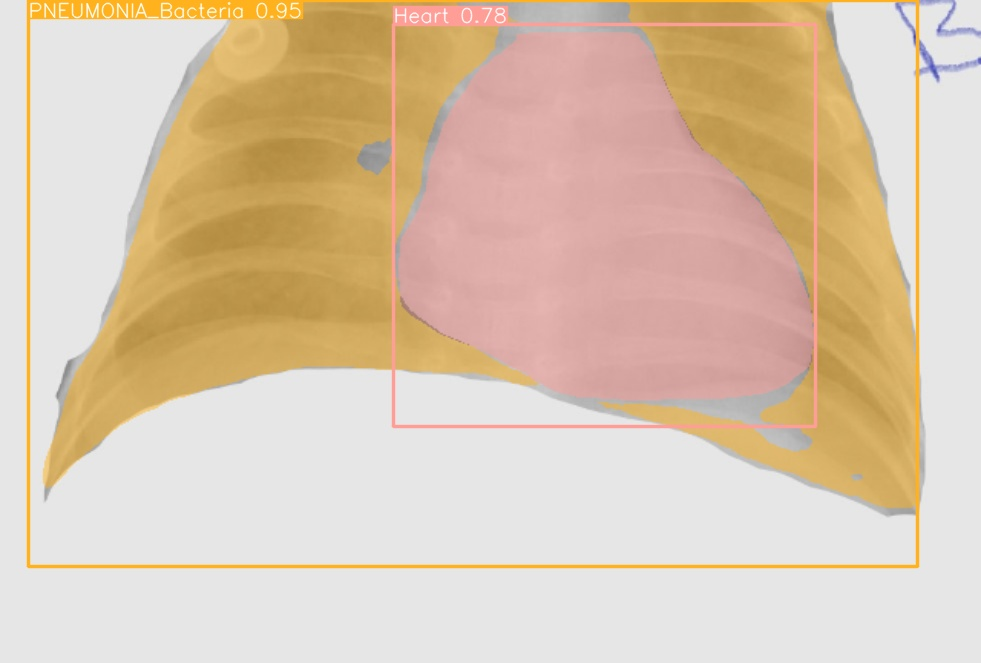

In [20]:
Image(filename='/content/drive/MyDrive/Segmentation/runs/segment/predict2/person14_bacteria_51.jpeg', height=600)

In [36]:
predict[0].masks.data[0].unique()

tensor([0., 1.], device='cuda:0')